In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from snn import Network

In [3]:
NEURONS = 1
# milliseconds
SIM_TIME = 1000
# milliampers
CONST_CURRENT = 7
RESTING_POTENTIAL = np.full(NEURONS, -70)
CLAMP_VOLTAGES = True
dt = 0.5
sim_length = int(SIM_TIME / dt)



a = np.full(NEURONS, 0.02)
b = np.full(NEURONS, 0.2)
c = np.full(NEURONS, -65)
d = np.full(NEURONS, 8)
SPIKING_THRESHOLDS = np.full(NEURONS, 35)

In [4]:
network = Network(a, b, c, d, RESTING_POTENTIAL, SPIKING_THRESHOLDS, dt)

In [5]:
membrane_potentials = np.empty((sim_length, NEURONS))
membrane_potentials[0, :] = network.v
input_currents = np.full((sim_length, NEURONS), CONST_CURRENT)

for t in range(1, sim_length):
    network.step(input_currents[t, :])
    membrane_potentials[t, :] = network.v

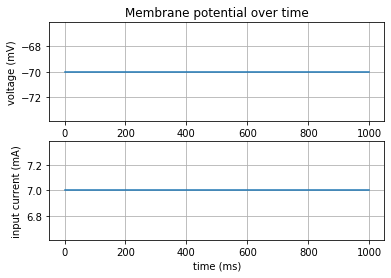

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1)
time = list(range(SIM_TIME))
ax1.plot(time, [membrane_potentials[int(i/dt)][0] for i in time])
ax1.set(ylabel='voltage (mV)',
        title='Membrane potential over time')
ax1.grid()

ax2.plot(time, [input_currents[int(i/dt)][0] for i in time])
ax2.set(xlabel='time (ms)', ylabel='input current (mA)')
ax2.grid()
fig.savefig("membrane_potential.png")